In [28]:
import numpy as np
import os
from collections import defaultdict

ATTN_DATA_DIR = './attn_data'

# Function to load attention scores and gradients
def load_attention_data(iter_list=[], base_dir=ATTN_DATA_DIR):
    data = {}
    for iter_idx in sorted(os.listdir(base_dir)):
        iter_idx = int(iter_idx)
        if len(iter_list) > 0 and iter_idx not in iter_list:
            continue

        print('-' * 80)
        print(f'Loading data for iteration {iter_idx}')
        iter_path = os.path.join(base_dir, str(iter_idx))

        data[iter_idx] = {}
        for layer_idx in sorted(os.listdir(iter_path)):
            layer_idx = int(layer_idx)
            print('-' * 40)
            print(f'Loading data for layer {layer_idx}')
            layer_path = os.path.join(iter_path, str(layer_idx))

            data[iter_idx][layer_idx] = {}
    
            # Scan all files in layer_path
            rank_files = [f for f in os.listdir(layer_path) if f.endswith('.npy')]
            for rank_file in rank_files:
                data_type, rank = rank_file.split('.')[0].split('_')
                rank = int(rank)
                if rank not in data[iter_idx][layer_idx]:
                    data[iter_idx][layer_idx][rank] = {}

                print(f'Loading {data_type} data for rank {rank}...', end = ' ')
                try :
                    data[iter_idx][layer_idx][rank][data_type] = np.load(os.path.join(layer_path, rank_file))
                    print('Done.')
                except FileNotFoundError:
                    print('Failed (file not found).')
                    data[iter_idx][layer_idx][rank][data_type] = None

    return data

In [29]:
attn_data = load_attention_data(iter_list=[9])

--------------------------------------------------------------------------------
Loading data for iteration 9
----------------------------------------
Loading data for layer 0
Loading attn data for rank 0... Done.
Loading grad data for rank 0... Done.
----------------------------------------
Loading data for layer 1
Loading attn data for rank 0... Done.
Loading grad data for rank 0... Done.
----------------------------------------
Loading data for layer 2
Loading attn data for rank 0... Done.
Loading grad data for rank 0... Done.
----------------------------------------
Loading data for layer 3
Loading attn data for rank 0... Done.
Loading grad data for rank 0... Done.


In [30]:
attn_data[9][0][0]['attn']

array([[[[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [6.78710938e-02, 9.33593750e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [5.54687500e-01, 4.43359375e-01, 2.94494629e-03, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [2.76565552e-05, 9.72747803e-05, 1.47819519e-05, ...,
          1.77621841e-05, 0.00000000e+00, 0.00000000e+00],
         [3.93390656e-05, 2.63977051e-03, 4.82559204e-04, ...,
          1.66893005e-04, 7.32421875e-04, 0.00000000e+00],
         [1.38854980e-03, 2.93731689e-04, 1.71661377e-05, ...,
          1.50299072e-03, 2.47955322e-05, 3.67164612e-05]],

        [[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [6.87500000e-01, 3.14453125e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        

## Visualizing Attention Scores

In [22]:
import matplotlib.pyplot as plt

def visualize_attention_and_gradients(data, iter_idx, layer_idx, rank, batch_idx=0):
    attn_scores = data[iter_idx][layer_idx][rank]['attn']
    grads = data[iter_idx][layer_idx][rank]['grad']
    
    num_heads = attn_scores.shape[1]  # assuming attn_scores have shape [bsz, num_heads, seq_len, seq_len]

    fig, axes = plt.subplots(2, num_heads, figsize=(3 * num_heads, 6))
    fig.suptitle(f"Attention Scores and Gradients for Iter {iter_idx}, Layer {layer_idx}", fontsize=16)
    
    for i in range(num_heads):
        # Plot attention scores
        ax1 = axes[0, i]
        ax1.imshow(attn_scores[batch_idx][i], cmap="viridis", aspect="auto")
        # ax1.set_title(f"Head {i} Scores")
        ax1.axis("off")
        
        # Plot gradients
        ax2 = axes[1, i]
        ax2.imshow(grads[batch_idx][i], cmap="coolwarm", aspect="auto")
        # ax2.set_title(f"Head {i} Gradients")
        ax2.axis("off")

    plt.show()

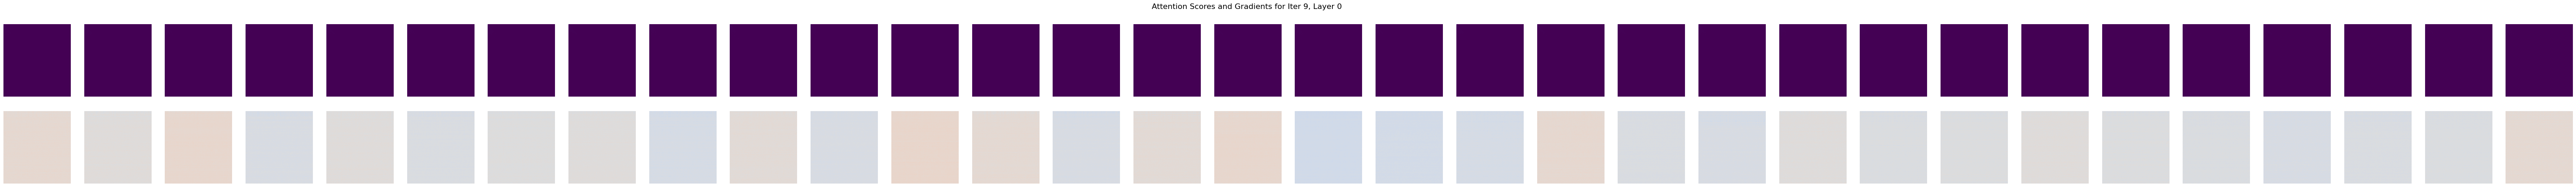

In [31]:
# Example usage
visualize_attention_and_gradients(attn_data, 9, 0, 0)  # specify iter_idx and layer_idx as strings